In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Carregando o arquivo de dados
file_path = 'data/portilexicon-ud.tsv'
lexicon = pd.read_csv(file_path, sep='\t', header=None)

# Renomeando as colunas
cols = []
for index, row in lexicon[3].str.split('|', expand=True).iterrows():
    cols.extend(list(filter(None, row.str.split('=', expand=True)[0].unique())))
    cols = list(set(cols))
cols.remove("_")
print(cols)
cols_name = [i.lstrip() for i in cols]
print(cols_name)


['PronType', 'Mood', 'Foreign', 'NumType', 'Number', 'Tense', 'Poss', 'Case', ' Number', 'VerbForm', 'Abbr', 'Person', 'Definite', 'Gender']
['PronType', 'Mood', 'Foreign', 'NumType', 'Number', 'Tense', 'Poss', 'Case', 'Number', 'VerbForm', 'Abbr', 'Person', 'Definite', 'Gender']


In [7]:
# constrói dataframe
df_lexicon = pd.DataFrame(columns=['words', 'infinitive'])
df_lexicon['words'] = lexicon[0]
df_lexicon['infinitive'] = lexicon[1]
df_lexicon['pos'] = lexicon[2]
for col_name in cols_name:
    df_lexicon[col_name.lower()] = lexicon[3].str.split(col_name + '=', expand=True)[1].str.split('|', expand=True)[0]

df_lexicon.isna().sum()
df_lexicon.head()
# preenche vazios
#df_lexicon.fillna('NA', inplace=True)
#df_lexicon['gender'].fillna('NA', inplace=True)
#df_lexicon['number'].fillna('NA', inplace=True)

,words,infinitive,pos,prontype,mood,foreign,numtype,number,tense,poss,case,verbform,abbr,person,definite,gender
0,a,a,ADP,None,None,None,None,None,None,None,None,None,None,None,None,None
1,a,a,NOUN,None,None,None,None,Sing,None,None,None,None,None,None,None,Masc
2,a,o,DET,Art,None,None,None,Sing,None,None,None,None,None,None,Def,Fem
3,a,o,PRON,Prs,None,None,None,Sing,None,None,Acc,None,None,3,None,Fem
4,a,o,PRON,Dem,None,None,None,Sing,None,None,None,None,None,3,None,Fem


In [12]:
df_lexicon.to_csv('portilexicon-ud.csv', index=False)

In [8]:
# Resumo estatístico das colunas numéricas
print(df_lexicon.describe())


          words infinitive      pos prontype    mood foreign numtype   number  \
count   1226024    1226024  1226024      295  848287     135     179  1192172   
unique   862199      79086       13        6       4       1       2        4   
top        fora         ir     VERB      Ind     Ind     Yes     Ord     Plur   
freq         11        148  1020519      113  431206     135     130   602833   

         tense poss case verbform  abbr  person definite  gender  
count   689892   40   44  1078377  2384  934611        8  237613  
unique       5    1    3        4     1       3        2       2  
top       Pres  Yes  Acc      Fin   Yes       2      Def     Fem  
freq    172498   40   17   848287  2384  316542        4  119757  


In [9]:
# Contagem de valores únicos em cada coluna
print(df_lexicon.nunique())

words         862199
infinitive     79086
pos               13
prontype           6
mood               4
foreign            1
numtype            2
number             4
tense              5
poss               1
case               3
verbform           4
abbr               1
person             3
definite           2
gender             2
dtype: int64


In [10]:
# Verificando os tipos de dados das colunas
print(df_lexicon.dtypes)

words         object
infinitive    object
pos           object
prontype      object
mood          object
foreign       object
numtype       object
number        object
tense         object
poss          object
case          object
verbform      object
abbr          object
person        object
definite      object
gender        object
dtype: object


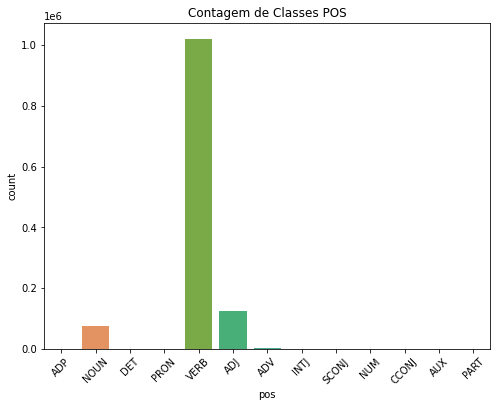

In [11]:
# Gráfico de contagem das classes POS
plt.figure(figsize=(8, 6))
sns.countplot(data=df_lexicon, x='pos')
plt.title('Contagem de Classes POS')
plt.xticks(rotation=45)
plt.show()

In [15]:
df_lexicon[df_lexicon['pos'] == 'VERB']

,words,infinitive,pos,prontype,mood,foreign,numtype,number,tense,poss,case,verbform,abbr,person,definite,gender
6,aba,abar,VERB,None,Imp,None,None,Sing,None,None,None,Fin,None,2,None,None
7,aba,abar,VERB,None,Ind,None,None,Sing,Pres,None,None,Fin,None,3,None,None
8,ababada,ababadar,VERB,None,Imp,None,None,Sing,None,None,None,Fin,None,2,None,None
9,ababada,ababadar,VERB,None,Ind,None,None,Sing,Pres,None,None,Fin,None,3,None,None
11,ababadada,ababadar,VERB,None,None,None,None,Sing,None,None,None,Part,None,None,None,Fem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225665,éramos,ser,VERB,None,Ind,None,None,Plur,Imp,None,None,Fin,None,1,None,None
1225671,éreis,ser,VERB,None,Ind,None,None,Plur,Imp,None,None,Fin,None,2,None,None
1225675,és,ser,VERB,None,Ind,None,None,Sing,Pres,None,None,Fin,None,2,None,None
1225727,íamos,ir,VERB,None,Ind,None,None,Plur,Imp,None,None,Fin,None,1,None,None


In [16]:
df_lexicon[df_lexicon['pos'] == 'NOUN']

,words,infinitive,pos,prontype,mood,foreign,numtype,number,tense,poss,case,verbform,abbr,person,definite,gender
1,a,a,NOUN,None,None,None,None,Sing,None,None,None,None,None,None,None,Masc
5,aba,aba,NOUN,None,None,None,None,Sing,None,None,None,None,None,None,None,Fem
308,abacado,abacado,NOUN,None,None,None,None,Sing,None,None,None,None,None,None,None,Masc
309,abacados,abacado,NOUN,None,None,None,None,Plur,None,None,None,None,None,None,None,Masc
386,abacate,abacate,NOUN,None,None,None,None,Sing,None,None,None,None,None,None,None,Masc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226018,útero,útero,NOUN,None,None,None,None,Sing,None,None,None,None,None,None,None,Masc
1226019,úteros,útero,NOUN,None,None,None,None,Plur,None,None,None,None,None,None,None,Masc
1226021,útil,útil,NOUN,None,None,None,None,Sing,None,None,None,None,None,None,None,None
1226022,úvula,úvula,NOUN,None,None,None,None,Sing,None,None,None,None,None,None,None,Fem
